# Normalisasi Histogram Citra

<b> Histogram citra </b> adalah interpretasi grafis dari nilai intensitas piksel citra. Hal ini dapat diartikan sebagai struktur data yang menyimpan frekuensi dari semua tingkat intensitas piksel pada citra. Pada histogram citra, <b> sumbu X  </b> merepresentasikan <b> tingkat intensitas piksel citra </b> dan <b> sumbu Y  </b> merepresentasikan <b> frekuensi atau jumlah piksel yang memiliki nilai intensitas tertentu. </b>

Seringkali dibutuhkan histogram yang dinormalisasi dengan jumlah seluruh piksel, seperti ketika citra terlihat buram karena tidak memiliki kontras yang memadai. Hal ini dapat diatasi dengan melakukan normalisasi histogram. 

<b> Normalisasi histogram </b> adalah teknik pemrosesan citra yang menyesuaikan kontras citra dengan menggunakan histogramnya. Untuk meningkatkan kontras citra, normalisasi menyebarkan nilai intensitas piksel yang paling sering atau memperluas rentang intensitas piksel pada citra. Dengan melakukan ini, normalisasi histogram memungkinkan area citra dengan kontras yang lebih rendah untuk mendapatkan kontras yang lebih tinggi. Menerapkan pemerataan atau normalisasi histogram dimulai dengan menghitung histogram intensitas piksel dalam citra <i> grayscale. </i> 

Pada dasarnya, pemerataan atau normalisasi histogram citra bekerja dengan:
<ul>
<li>Menghitung histogram intensitas piksel citra</li>
<li>Menyebarkan dan mendistribusikan nilai piksel yang paling sering secara merata (yang memiliki jumlah terbesar dalam histogram)</li>
<li>Memberikan tren linier pada fungsi distribusi kumulatif (CDF)</li>
</ul>

## Citra yang Akan Digunakan

|mushroom1|mushroom2|mushroom3|mushroom4|
|:-:|:-:|:-:|:-:|
|[![mushroom1.jpeg](https://i.postimg.cc/pL0BM4nh/mushroom1.jpg)](https://postimg.cc/hXdm9Csc)|[![mushroom2.jpeg](https://i.postimg.cc/rpKNVjSh/mushroom2.jpg)](https://postimg.cc/xkVzgKpH)|[![mushroom3.jpeg](https://i.postimg.cc/43qbmcPX/mushroom3.jpg)](https://postimg.cc/67VGPyFP)|[![mushroom4.jpeg](https://i.postimg.cc/85vdWCXM/mushroom4.jpg)](https://postimg.cc/1n9N1yQ3)

## Import Libraries
Sebelum melakukan langkah-langkah selanjutnya, terlebih dahulu dilakukan <i> import libraries </i> yang diperlukan dan ditentukan <i>.

In [1]:
# import library
import cv2
import matplotlib.pyplot as plt
import numpy as np

# working directory
import os
os.getcwd()

'/content'

## Menampilkan Citra yang Akan Digunakan
Citra yang akan digunakan adalah keempat citra mushroom yang telah ditampilkan di bagian awal, yaitu mushroom1, mushroom2, mushroom3, dan mushroom4.

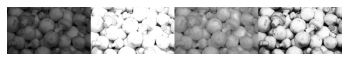

In [2]:
# read images
# use 0 to read image in grayscale mode
img1=cv2.imread('mushroom1.jpeg',0) 
img2=cv2.imread('mushroom2.jpeg',0) 
img3=cv2.imread('mushroom3.jpeg',0) 
img4=cv2.imread('mushroom4.jpeg',0) 
citra = np.hstack((img1, img2, img3, img4))
plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(citra, cv2.COLOR_GRAY2RGB))

## Normalisasi Histogram Citra 1: mushroom1
Dengan menggunakan citra yang pertama, yaitu mushroom 1, dibentuk histogram citra dan dilakukan normalisasi dengan langkah-langkah sebagai berikut.

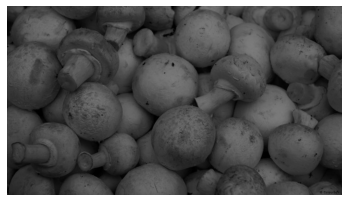

In [3]:
# matplotlib expects RGB images so convert and then display the image with matplotlib
plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_GRAY2RGB))

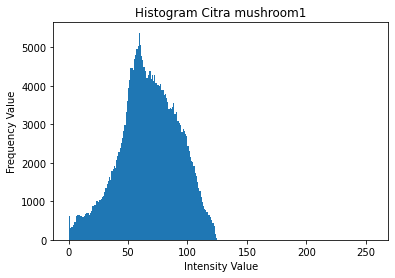

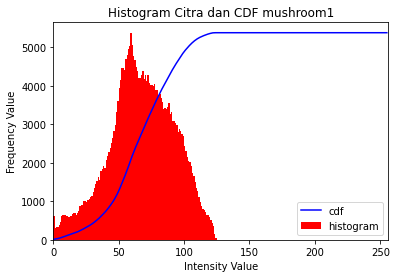

In [4]:
# plot histogram awal citra mushroom1
# tanpa CDF
plt.hist(img1.ravel(),256,[0,256])
plt.xlabel('Intensity Value')
plt.ylabel('Frequency Value')
plt.title('Histogram Citra mushroom1')
plt.show()
# dengan CDF
hist,bins = np.histogram(img1.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img1.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'lower right')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency Value')
plt.title('Histogram Citra dan CDF mushroom1')
plt.show()

<hr>
<b> Histogram terkonsentrasi pada nilai-nilai <i> grayscale </i> yang rendah </b> atau menumpuk pada sisi histogram sebelah kiri dengan sebagian besar intensitas piksel berkisar antara 0 dan 125, memuncak di sekitar 55. Namun, area paling kanan tidak memiliki nilai intensitas piksel. Selain itu, garis fungsi distribusi kumulatif (CDF) juga tampak tidak linier. Hal ini menunjukkan bahwa citra mushroom1 memiliki kontras yang buruk dan merupakan citra yang gelap (<i>under-exposed</i>). Untuk memperbaikinya, metode <i>.equalizeHist()</i> <i> OpenCV-Python </i> digunakan untuk menyebarkan nilai intensitas piksel.
<hr>

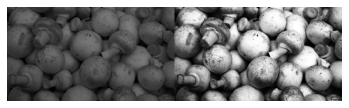

In [5]:
# hasil citra ternormalisasi
img1e = cv2.equalizeHist(img1)
# membandingkan kedua citra
perbandingan1 = np.hstack((img1, img1e))
plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(perbandingan1, cv2.COLOR_GRAY2RGB))

Diperoleh <i> output </i> citra yang atas merupakan citra awal mushroom1 <b> sebelum dinormalisasi </b> dan citra yang bawah merupakan citra mushroom1 <b> sesudah dinormalisasi.</b>

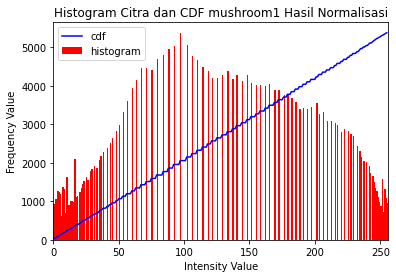

In [6]:
# plot histogram dengan normalisasi
hist,bins = np.histogram(img1e.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img1e.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency Value')
plt.title('Histogram Citra dan CDF mushroom1 Hasil Normalisasi')
plt.show()

<hr>
Berbeda dengan histogram awal, histogram hasil normalisasi tidak lagi hanya terkonsentrasi pada nilai-nilai <i> grayscale </i> yang rendah atau tidak lagi menumpuk pada sisi histogram sebelah kiri dan nilai intensitas piksel sekarang menyebar berkisar dari 0 hingga 255 pada sumbu X. Selain itu, garis fungsi distribusi kumulatif (CDF) sekarang linier. <b> Hal ini menunjukkan bahwa histogram telah ternormalisasi. </b>
<hr>

## Normalisasi Histogram Citra 2: mushroom2
Dengan menggunakan citra yang kedua, yaitu mushroom 2, dibentuk histogram citra dan dilakukan normalisasi dengan langkah-langkah sebagai berikut.

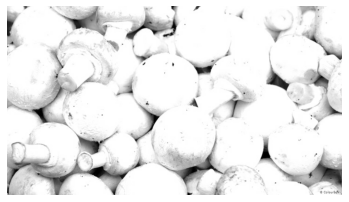

In [7]:
# matplotlib expects RGB images so convert and then display the image with matplotlib
plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_GRAY2RGB))

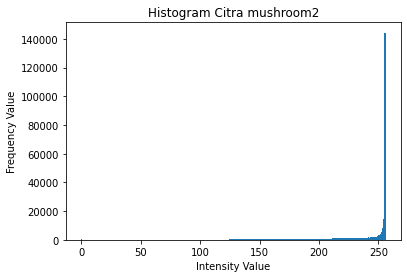

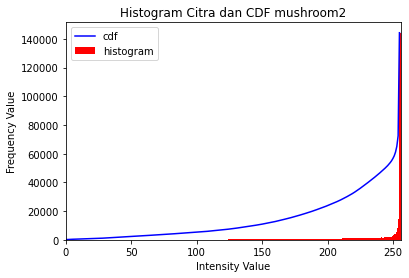

In [8]:
# plot histogram awal citra mushroom2
# tanpa CDF
plt.hist(img2.ravel(),256,[0,256])
plt.xlabel('Intensity Value')
plt.ylabel('Frequency Value')
plt.title('Histogram Citra mushroom2')
plt.show()
# dengan CDF
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency Value')
plt.title('Histogram Citra dan CDF mushroom2')
plt.show()

<hr>
<b> Histogram terkonsentrasi pada nilai-nilai <i> grayscale </i> yang tinggi </b> atau menumpuk pada sisi histogram sebelah kanan dengan sebagian besar intensitas piksel berkisar 125 dan 255, memuncak di sekitar 255. Namun, area paling kiri tidak memiliki nilai intensitas piksel. Selain itu, garis fungsi distribusi kumulatif (CDF) juga tampak tidak linier. Hal ini menunjukkan bahwa citra mushroom2 memiliki kontras yang buruk dan merupakan citra yang terang (<i>over-exposed</i>). Untuk memperbaikinya, metode <i>.equalizeHist()</i> <i> OpenCV-Python </i> digunakan untuk menyebarkan nilai intensitas piksel.
<hr>

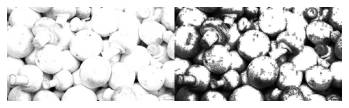

In [9]:
# hasil citra ternormalisasi
img2e = cv2.equalizeHist(img2)
# membandingkan kedua citra
perbandingan2 = np.hstack((img2, img2e))
plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(perbandingan2, cv2.COLOR_GRAY2RGB))

Diperoleh <i> output </i> citra yang atas merupakan citra awal mushroom2 <b> sebelum dinormalisasi </b> dan citra yang bawah merupakan citra mushroom2 <b> sesudah dinormalisasi.</b>

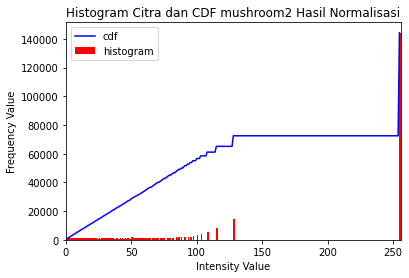

In [10]:
# plot histogram dengan normalisasi
hist,bins = np.histogram(img2e.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2e.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency Value')
plt.title('Histogram Citra dan CDF mushroom2 Hasil Normalisasi')
plt.show()

<hr>
Berbeda dengan histogram awal, nilai intensitas piksel sekarang menyebar berkisar dari 0 hingga 255 pada sumbu X. <b> Hal ini menunjukkan bahwa histogram telah ternormalisasi. </b>
Namun, terlihat jelas bahwa frekuensi pada intensitas <i> grayscale </i> yang tinggi sangatlah besar dan garis CDF tidak linier secara sempurna. Dengan demikian, setelah dilakukan normalisasi histogram, citra mushroom2 akan tetap cenderung memiliki frekuensi yang tinggi pada intensitas warna <i> grayscale </i> yang tinggi atau mendekati putih.
<hr>

## Normalisasi Histogram Citra 3: mushroom3
Dengan menggunakan citra yang ketiga, yaitu mushroom 3, dibentuk histogram citra dan dilakukan normalisasi dengan langkah-langkah sebagai berikut.

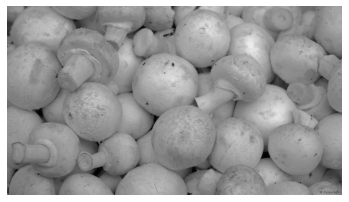

In [11]:
# matplotlib expects RGB images so convert and then display the image with matplotlib
plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_GRAY2RGB))

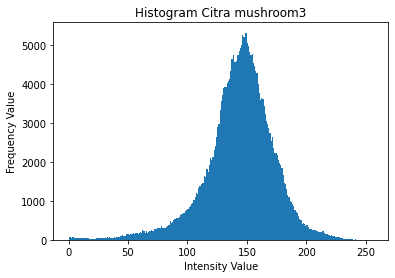

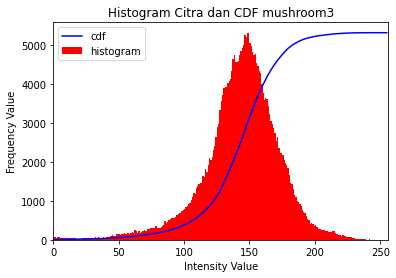

In [12]:
# plot histogram awal citra mushroom3
# tanpa CDF
plt.hist(img3.ravel(),256,[0,256])
plt.xlabel('Intensity Value')
plt.ylabel('Frequency Value')
plt.title('Histogram Citra mushroom3')
plt.show()
# dengan CDF
hist,bins = np.histogram(img3.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img3.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency Value')
plt.title('Histogram Citra dan CDF mushroom3')
plt.show()

<hr>
<b> Histogram terpusat di pertengahan nilai-nilai <i> grayscale </i> </b> dengan sebagian besar intensitas piksel berkisar antara 0 dan 240, memuncak di sekitar 150. Namun, area paling kanan tidak memiliki nilai intensitas piksel. Selain itu, garis fungsi distribusi kumulatif (CDF) juga tampak tidak linier. Hal ini menunjukkan bahwa citra mushroom3 memiliki kontras yang buruk dan merupakan citra yang berkontras rendah (<i>low-contrast</i>). Untuk memperbaikinya, metode <i>.equalizeHist()</i> <i> OpenCV-Python </i> digunakan untuk menyebarkan nilai intensitas piksel.
<hr>

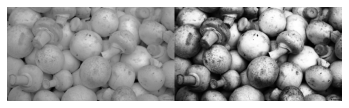

In [13]:
# hasil citra ternormalisasi
img3e = cv2.equalizeHist(img3)
# membandingkan kedua citra
perbandingan3 = np.hstack((img3, img3e))
plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(perbandingan3, cv2.COLOR_GRAY2RGB))

Diperoleh <i> output </i> citra yang atas merupakan citra awal mushroom3 <b> sebelum dinormalisasi </b> dan citra yang bawah merupakan citra mushroom3 <b> sesudah dinormalisasi.</b>

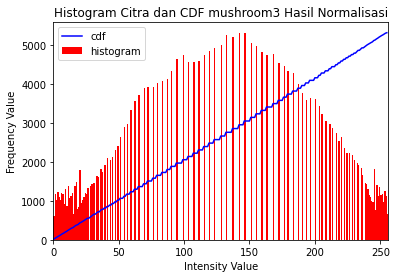

In [14]:
# plot histogram dengan normalisasi
hist,bins = np.histogram(img3e.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img3e.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency Value')
plt.title('Histogram Citra dan CDF mushroom3 Hasil Normalisasi')
plt.show()

<hr>
Berbeda dengan histogram awal, histogram hasil normalisasi tidak lagi hanya terpusat di pertengahan nilai-nilai <i> grayscale </i> dan nilai intensitas piksel sekarang menyebar berkisar dari 0 hingga 255 pada sumbu X. Selain itu, garis fungsi distribusi kumulatif (CDF) sekarang linier. <b> Hal ini menunjukkan bahwa histogram telah ternormalisasi. </b>
<hr>

## Normalisasi Histogram Citra 4: mushroom4
Dengan menggunakan citra yang keempat, yaitu mushroom 4, dibentuk histogram citra dan dilakukan normalisasi dengan langkah-langkah sebagai berikut.

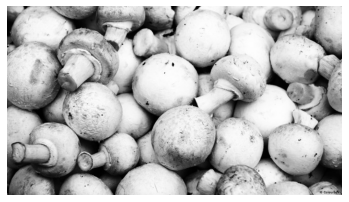

In [15]:
# matplotlib expects RGB images so convert and then display the image with matplotlib
plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_GRAY2RGB))

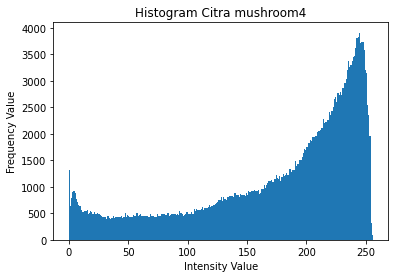

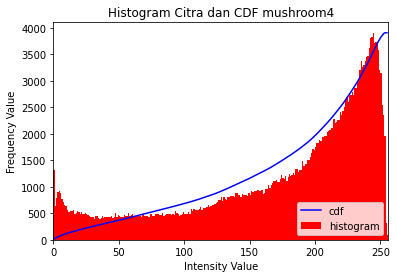

In [16]:
# plot histogram awal citra mushroom4
# tanpa CDF
plt.hist(img4.ravel(),256,[0,256])
plt.xlabel('Intensity Value')
plt.ylabel('Frequency Value')
plt.title('Histogram Citra mushroom4')
plt.show()
# dengan CDF
hist,bins = np.histogram(img4.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img4.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'lower right')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency Value')
plt.title('Histogram Citra dan CDF mushroom4')
plt.show()

<hr>
<b> Histogram lebih merata di seluruh nilai-nilai <i> grayscale </i> </b> dengan sebagian besar intensitas piksel berkisar antara 0 dan 255, memuncak di sekitar 240. Selain itu, garis fungsi distribusi kumulatif (CDF) juga tampak tidak linier. Hal ini menunjukkan bahwa citra mushroom4 memiliki kontras yang buruk dan merupakan citra yang berkontras tinggi (<i>high-contrast</i>). Untuk memperbaikinya, metode <i>.equalizeHist()</i> <i> OpenCV-Python </i> digunakan untuk menyebarkan nilai intensitas piksel.
<hr>

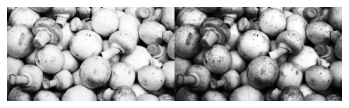

In [17]:
# hasil citra ternormalisasi
img4e = cv2.equalizeHist(img4)
# membandingkan kedua citra
perbandingan4 = np.hstack((img4, img4e))
plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(perbandingan4, cv2.COLOR_GRAY2RGB))

Diperoleh <i> output </i> citra yang atas merupakan citra awal mushroom4 <b> sebelum dinormalisasi </b> dan citra yang bawah merupakan citra mushroom4 <b> sesudah dinormalisasi.</b>

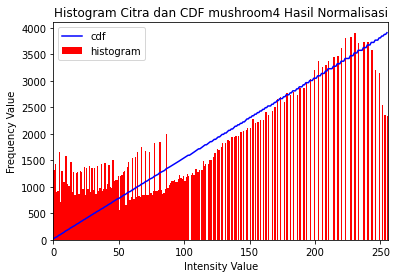

In [18]:
# plot histogram dengan normalisasi
hist,bins = np.histogram(img4e.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img4e.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency Value')
plt.title('Histogram Citra dan CDF mushroom4 Hasil Normalisasi')
plt.show()

<hr>
Berbeda dengan histogram awal, histogram hasil normalisasi menunjukkan nilai intensitas piksel sekarang menyebar berkisar dari 0 hingga 255 pada sumbu X. Selain itu, garis fungsi distribusi kumulatif (CDF) sekarang linier. <b> Hal ini menunjukkan bahwa histogram telah ternormalisasi. </b>
<hr>